## Cost Prediction on acquiring Customers 
<b>Cost to run a media campaign for US FoodMarts according to Income,Store Data<b>

<b>Problem Statement<b>
    
- The notion behind solving this problem of predicting media campaign cost has arisen from the exact opposite problem called customer churn rate or customer attrition rate. The customer retention has been a challenge for almost all the businesses in the current dynamic market and the Food Mart business is not an exception.


 - In this project we are trying to solve the problem faced by Food Mart (CFM) is a chain of convenience stores in the United States. The company actively wants to predict the accurate cost of running media campaign subject to different market conditions based on historical data.

<b>Data<b>
    
We need historical data for media campaign cost prediction and the historical data available with us has below curcial information.

 - Customers Income
 - Products
 - Promotion details
 - Store features (e.g. store address, average sales, etc.)

<b>Value Proposition<b>
    
Exploring the media campaign running cost in advance gives business an edge on several fronts while making business decisions.

 - Allocating optimal budget for running the media campaign
 - Granular level understanding of fundamental parameters necessary for effective campaigning
 - Understanding the trade-off between acquiring curstomer and attrition of existing customers
 - Improving on company's growth transformation by on-boarding new customers through targeted media campaigns
 - Staying ahead of the business competitors by making data driven and timely implementations of the policies

<b>Import Libraries and perform DQA<b>

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

In [2]:
# set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
# Read .csv data into the pandas dataframe

df = pd.read_csv('./Data/media prediction and its cost.csv')

In [4]:
# Shape of data

df.shape

(60428, 40)

In [5]:
# Glimpse of data

df.head(3)

food_category food_department food_family  store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)         promotion_name sales_country marital_status gender  total_children            education member_card      occupation houseowner  avg_cars_at home(approx) avg. yearly_income  num_children_at_home  avg_cars_at home(approx).1  brand_name   SRP  gross_weight  net_weight  recyclable_package  low_fat  units_per_case          store_type store_city store_state  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  coffee_bar  video_store  salad_bar  prepared_food  florist          media_type    cost
0  Breakfast Foods    Frozen Foods        Food                      7.36                   2.7232                      4.0           Bag Stuffers           USA              M      F             1.0  Partial High School      Normal  Skilled Manual          Y                       1.0        $10K - $30K                   1.0                         1.0  Carrington  1.84          19.7        17.7                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio  126.62
1  Breakfast Foods    Frozen Foods        Food                      5.52                   2.5944                      3.0  Cash Register Lottery           USA              M      M             0.0     Bachelors Degree      Silver    Professional          Y                       4.0        $50K - $70K                   0.0                         4.0  Carrington  1.84          19.7        17.7                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   59.86
2  Breakfast Foods    Frozen Foods        Food                      3.68                   1.3616                      2.0    High Roller Savings           USA              S      F             4.0  Partial High School      Normal          Manual          N                       1.0        $10K - $30K                   0.0                         1.0  Carrington  1.84          19.7        17.7                 1.0      0.0            17.0  Deluxe Supermarket      Salem          OR     27694.0       18670.0       5415.0     3610.0         1.0          1.0        1.0            1.0      1.0  Daily Paper, Radio   84.16

In [6]:
# Define function to display the missing values and their percentages per feature

def check_nulls(df_temp):
    null_values = pd.DataFrame()
    null_values['features'] = df.columns
    null_values['missing_values'] = df.isna().sum().values
    null_values['missing_values_percentage'] = (df.isna().sum()/df.shape[0]*100).values
    return null_values

In [7]:
# Check null values

check_nulls(df)

features  missing_values  missing_values_percentage
0                food_category               0                        0.0
1              food_department               0                        0.0
2                  food_family               0                        0.0
3     store_sales(in millions)               0                        0.0
4      store_cost(in millions)               0                        0.0
5      unit_sales(in millions)               0                        0.0
6               promotion_name               0                        0.0
7                sales_country               0                        0.0
8               marital_status               0                        0.0
9                       gender               0                        0.0
10              total_children               0                        0.0
11                   education               0                        0.0
12                 member_card               0                        0.0
13                  occupation               0                        0.0
14                  houseowner               0                        0.0
15    avg_cars_at home(approx)               0                        0.0
16          avg. yearly_income               0                        0.0
17        num_children_at_home               0                        0.0
18  avg_cars_at home(approx).1               0                        0.0
19                  brand_name               0                        0.0
20                         SRP               0                        0.0
21                gross_weight               0                        0.0
22                  net_weight               0                        0.0
23          recyclable_package               0                        0.0
24                     low_fat               0                        0.0
25              units_per_case               0                        0.0
26                  store_type               0                        0.0
27                  store_city               0                        0.0
28                 store_state               0                        0.0
29                  store_sqft               0                        0.0
30                grocery_sqft               0                        0.0
31                 frozen_sqft               0                        0.0
32                   meat_sqft               0                        0.0
33                  coffee_bar               0                        0.0
34                 video_store               0                        0.0
35                   salad_bar               0                        0.0
36               prepared_food               0                        0.0
37                     florist               0                        0.0
38                  media_type               0                        0.0
39                        cost               0                        0.0

<b>Observations from missing value check<b>

1. No missing values are found in the data

In [8]:
# Get the basic statistical details of continuous variables

df.describe()

store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  total_children  avg_cars_at home(approx)  num_children_at_home  avg_cars_at home(approx).1           SRP  gross_weight    net_weight  recyclable_package       low_fat  units_per_case    store_sqft  grocery_sqft   frozen_sqft     meat_sqft    coffee_bar   video_store     salad_bar  prepared_food       florist          cost
count              60428.000000             60428.000000             60428.000000    60428.000000              60428.000000          60428.000000                60428.000000  60428.000000  60428.000000  60428.000000        60428.000000  60428.000000    60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000  60428.000000   60428.000000  60428.000000  60428.000000
mean                   6.541031                 2.619460                 3.093169        2.533875                  2.200271              0.829351                    2.200271      2.115258     13.806433     11.796289            0.558665      0.350434       18.860694  27988.477494  19133.799696   5312.852552   3541.846280      0.612646      0.354157      0.587956       0.587956      0.562603     99.262366
std                    3.463047                 1.453009                 0.827677        1.490165                  1.109644              1.303424                    1.109644      0.932829      4.622693      4.682986            0.496551      0.477110       10.258555   5701.022090   3987.395735   1575.907263   1050.471635      0.487150      0.478261      0.492207       0.492207      0.496069     30.011257
min                    0.510000                 0.163200                 1.000000        0.000000                  0.000000              0.000000                    0.000000      0.500000      6.000000      3.050000            0.000000      0.000000        1.000000  20319.000000  13305.000000   2452.000000   1635.000000      0.000000      0.000000      0.000000       0.000000      0.000000     50.790000
25%                    3.810000                 1.500000                 3.000000        1.000000                  1.000000              0.000000                    1.000000      1.410000      9.700000      7.710000            0.000000      0.000000       10.000000  23593.000000  16232.000000   4746.000000   3164.000000      0.000000      0.000000      0.000000       0.000000      0.000000     69.650000
50%                    5.940000                 2.385600                 3.000000        3.000000                  2.000000              0.000000                    2.000000      2.130000     13.600000     11.600000            1.000000      0.000000       19.000000  27694.000000  18670.000000   5062.000000   3375.000000      1.000000      0.000000      1.000000       1.000000      1.000000     98.520000
75%                    8.670000                 3.484025                 4.000000        4.000000                  3.000000              1.000000                    3.000000      2.790000     17.700000     16.000000            1.000000      1.000000       28.000000  30797.000000  22123.000000   5751.000000   3834.000000      1.000000      1.000000      1.000000       1.000000      1.000000    126.620000
max                   22.920000                 9.726500                 6.000000        5.000000                  4.000000              5.000000                    4.000000      3.980000     21.900000     20.800000            1.000000      1.000000       36.000000  39696.000000  30351.000000   9184.000000   6122.000000      1.000000      1.000000      1.000000       1.000000      1.000000    149.750000

<b> Observations from .describe() <b>

1. Mean and median (50th percentile) are almost matching here 
2. Doesn't seem to be any major issue with the outliers or anomalies


In [9]:
# Get the basic statistical details of non-numerical variables

df.describe(include='object')

food_category food_department food_family    promotion_name sales_country marital_status gender            education member_card    occupation houseowner avg. yearly_income brand_name   store_type store_city store_state          media_type
count          60428           60428       60428             60428         60428          60428  60428                60428       60428         60428      60428              60428      60428        60428      60428       60428               60428
unique            45              22           3                49             3              2      2                    5           4             5          2                  8        111            5         19          10                  13
top       Vegetables         Produce        Food  Weekend Markdown           USA              S      F  Partial High School      Bronze  Professional          Y        $30K - $50K   Hermanos  Supermarket     Tacoma          WA  Daily Paper, Radio
freq            7440            8521       43284              2330         38892          30355  30942                18201       33807         19915      36510              19514       1839        26192       5704       19370                6820

<b>Observations from categorical .describe()<b>

1. Top food category = Vegetables
2. Top food department = Produce
3. Top promotion name = Weekend Markdown
4. Top sales country = USA
5. Top store state = WA
6. Top store city = Tacoma
7. Customers top avg yearly income = 30K - 50K
8. Customers top occupation = Professional
9. Customers top member card = Bronze


In [10]:
# Create new category by combining food category and department

df['food_cat_dept'] = df['food_category'] + '-' + df['food_department']

In [11]:
# Create new category by combining food category, department and food family

df['food_cat_dept_family'] = df['food_category'] + '-' + df['food_department'] + '-' + df['food_family']

In [12]:
# Identify all the numerical columns

all_cols = df.columns.tolist()
numeric_cols = []

for c in all_cols:
    if df[c].dtype != 'object':
        numeric_cols.append(c)

In [13]:
# Create data frame of numerical columns and target variable cost
# Calculate the correlation between target variable and all numeric variables

df_cont = df[numeric_cols]
df_cont['cost'] = df['cost']
df_cont_corr = df_cont.corr()
df_cont_corr = df_cont_corr.reset_index()[['index','cost']]
df_cont_corr = df_cont_corr.rename(columns={'index':'features'})

In [14]:
# List down the correlation coefficients in ascending order

df_cont_corr.sort_values('cost', ascending=False)

features      cost
22                        cost  1.000000
4     avg_cars_at home(approx)  0.011658
6   avg_cars_at home(approx).1  0.011658
11                     low_fat  0.004207
7                          SRP  0.002082
9                   net_weight  0.001343
8                 gross_weight  0.001281
10          recyclable_package -0.001720
5         num_children_at_home -0.002549
12              units_per_case -0.002776
3               total_children -0.003900
1      store_cost(in millions) -0.004162
0     store_sales(in millions) -0.004621
2      unit_sales(in millions) -0.015015
14                grocery_sqft -0.025108
13                  store_sqft -0.039656
16                   meat_sqft -0.047962
15                 frozen_sqft -0.047971
17                  coffee_bar -0.060859
21                     florist -0.087340
19                   salad_bar -0.095596
20               prepared_food -0.095596
18                 video_store -0.111214

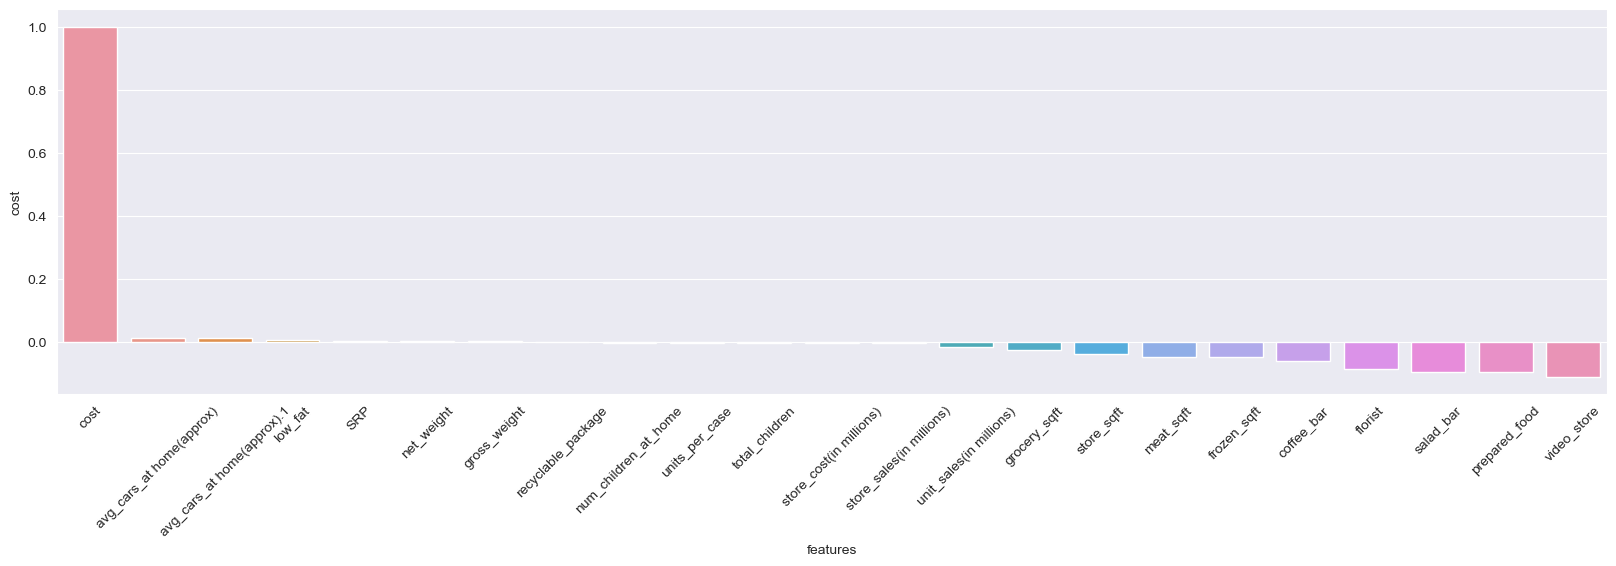

In [15]:
# Plot the correlation between numeric variables and target variable cost

plt.figure(figsize=(20,5))
sns.barplot(data=df_cont_corr,
            x='features',
            y='cost',
            order=df_cont_corr.sort_values('cost',ascending=False).features)
plt.xticks(rotation=45)
plt.show()

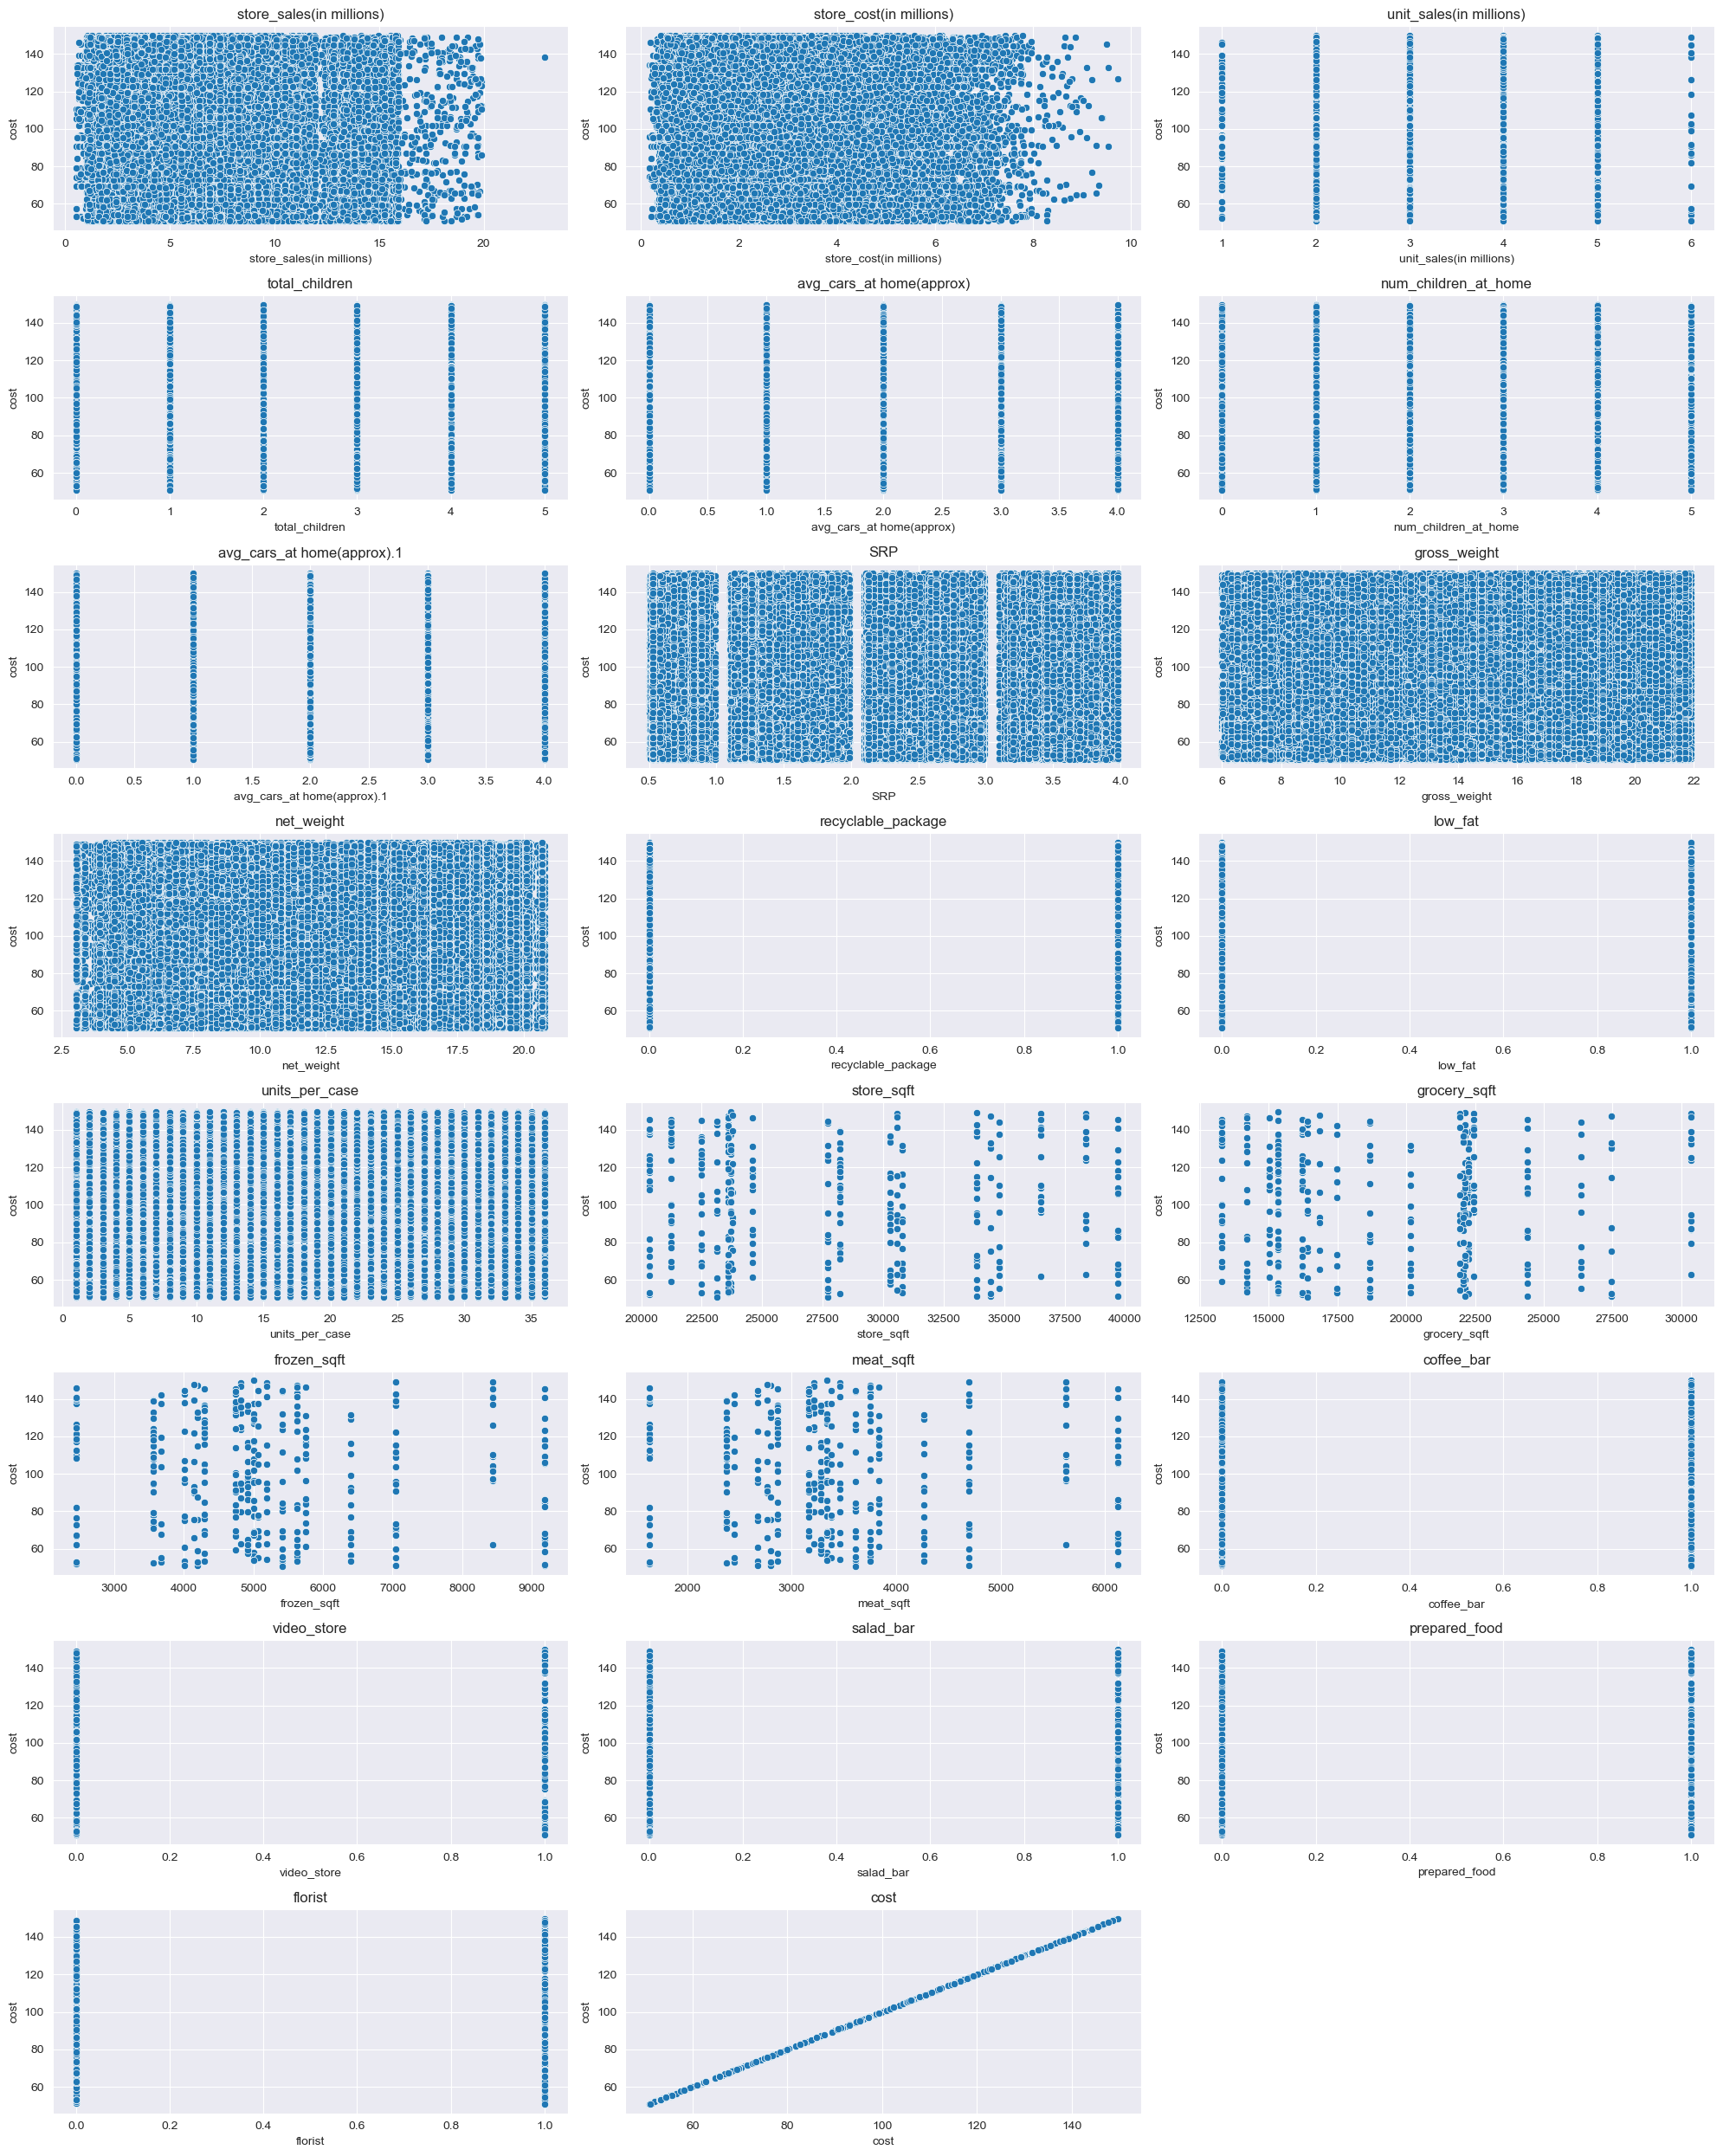

In [16]:
# Plot scatterplot of target variable vs all the numerica variables

plt.figure(figsize=(20,25))

for i in range(len(numeric_cols)):
    plt.subplot(8,3,i+1)
    sns.scatterplot(df[numeric_cols[i]],df['cost'])
    plt.title(numeric_cols[i])
    plt.tight_layout()

plt.show()

In [17]:
# Looking at the above scatterplot, categorize features into the discrete and continuous

# Discrete columns:
    # unit_sales(in millions)
    # total_children
    # avg_cars_at home(approx)
    # num_children_at_home
    # avg_cars_at home(approx).1
    # recyclable_package
    # low_fat
    # units_per_case
    # coffee_bar
    # video_store
    # salad_bar
    # prepared_food
    # florist

# Cont. features:
    # store_sales(in millions)
    # store_cost(in millions)
    # SRP
    # gross_weight
    # net_weight
    # store_sqft
    # grocery_sqft
    # frozen_sqft
    # meat_sqft

In [18]:
# Discrete numeric features

discrete_numeric_cols = [
    'unit_sales(in millions)',
    'total_children',
    'avg_cars_at home(approx)',
    'num_children_at_home',
    'avg_cars_at home(approx).1',
    'recyclable_package',
    'low_fat',
    'units_per_case',
    'coffee_bar',
    'video_store',
    'salad_bar',
    'prepared_food',
    'florist']

cont_numeric_cols = [
    'store_sales(in millions)',
    'store_cost(in millions)',
    'SRP',
    'gross_weight',
    'net_weight',
    'store_sqft',
    'grocery_sqft',
    'frozen_sqft',
    'meat_sqft'
]
    

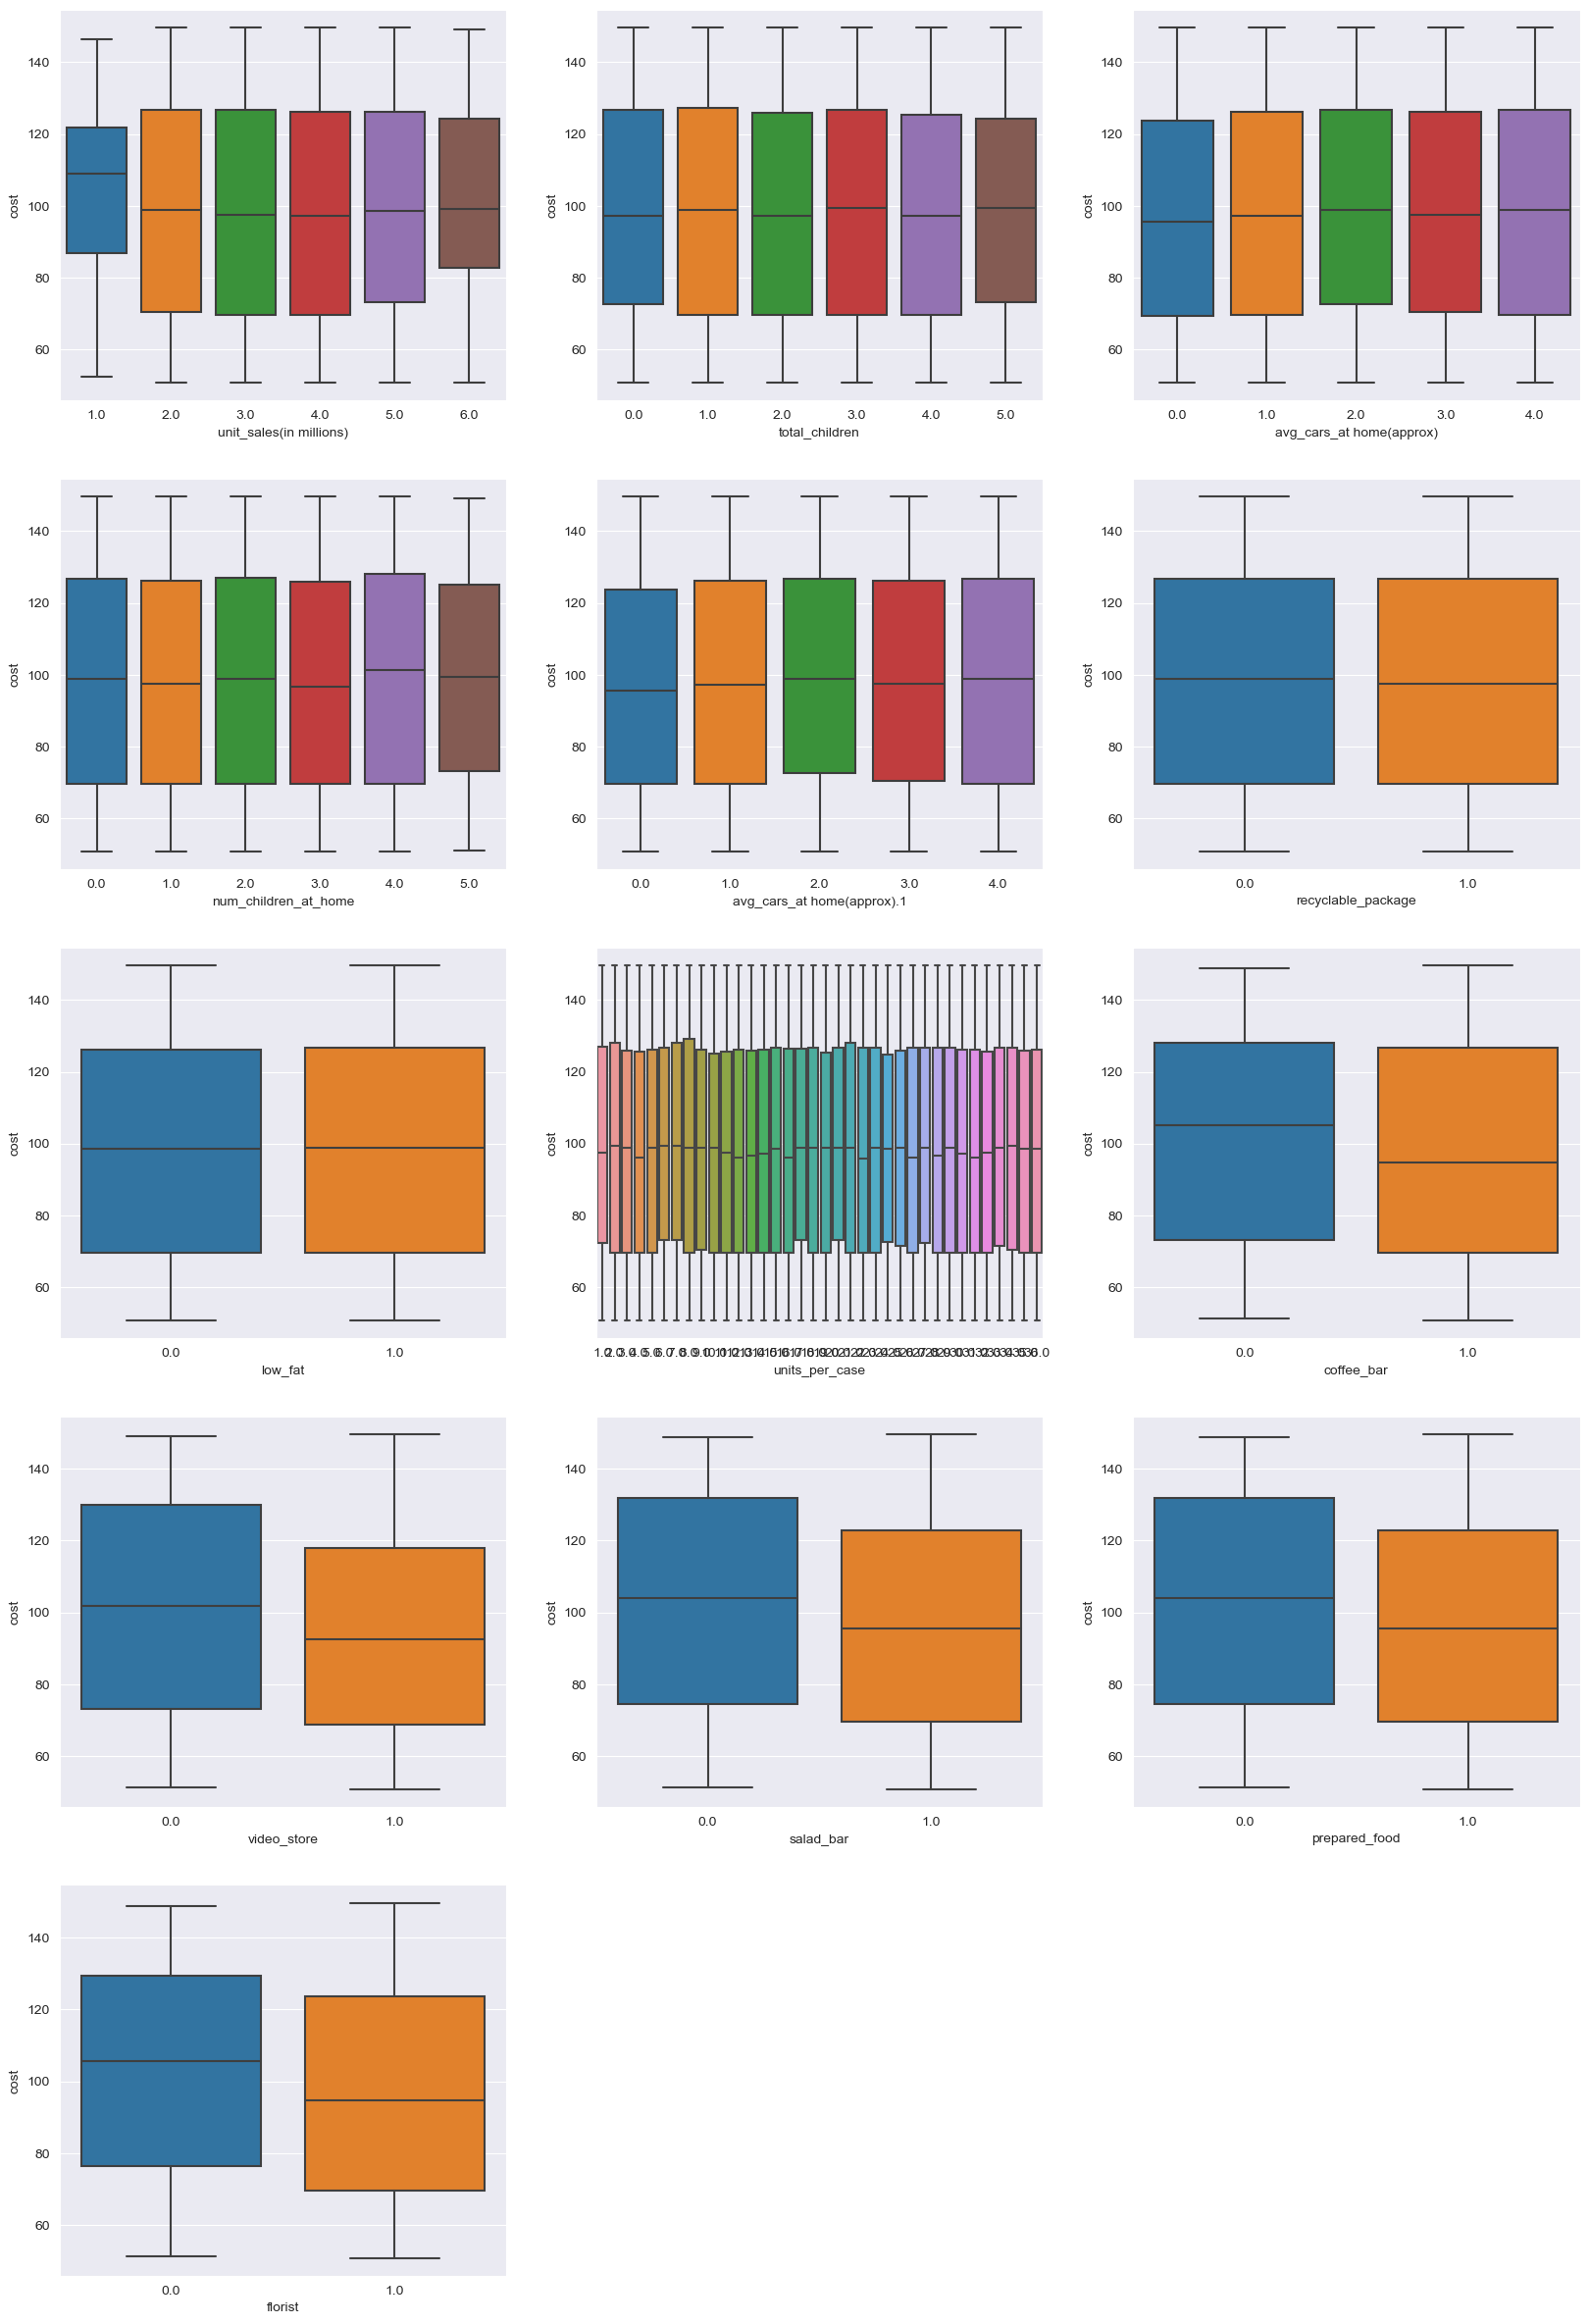

In [19]:
# plot discrete numeric features against cost variable

plt.figure(figsize=(20,30))
for i in range(len(discrete_numeric_cols)):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=df,x=df[discrete_numeric_cols[i]], y='cost')
    
plt.show()

In [20]:
# Discrete numeric features that seems to have impact on target variable cost are -
#     'unit_sales(in millions)',
#     'total_children',
#     'avg_cars_at home(approx)',
#     'num_children_at_home',
#     'avg_cars_at home(approx).1',
#     'units_per_case',
#     'coffee_bar',
#     'video_store',
#     'salad_bar',
#     'prepared_food',
#     'florist'

# Discrete numeric features that doesn't seem to have impact on target variable cost are -
#     'recyclable_package',
#     'low_fat',


In [21]:
# plot cont. numeric features against cost feature

plt.figure(figsize=(20,20))

for i in range(len(cont_numeric_cols)):
    plt.subplot(3,3,i+1)
    sns.scatterplot(df[cont_numeric_cols[i]],df['cost'])
    plt.title(cont_numeric_cols[i])
    plt.tight_layout()

plt.show()

In [22]:
# Standardize the the numeric cont. features along with cost variable to see the standardized plots

df_cont_numeric = df[cont_numeric_cols]
df_cont_numeric['cost'] = df['cost']
scaler = StandardScaler()
df_cont_numeric_scaled = scaler.fit_transform(df_cont_numeric)
df_cont_numeric_scaled = pd.DataFrame(df_cont_numeric_scaled, columns=df_cont_numeric.columns)

In [23]:
# Plot standardized features against cost variable

plt.figure(figsize=(20,20))

for i in range(len(cont_numeric_cols)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df_cont_numeric_scaled[cont_numeric_cols[i]],label=cont_numeric_cols[i])
    sns.kdeplot(df_cont_numeric_scaled['cost'],label='cost')
    plt.legend()

plt.show()

In [24]:
# Cont. numeric features that seems to have impact on target variable cost

#     'store_sales(in millions)',
#     'store_cost(in millions)',
#     'SRP',
#     'gross_weight',
#     'net_weight',
#     'store_sqft',
#     'grocery_sqft',
#     'frozen_sqft',
#     'meat_sqft'

# Note - Any one of the below 3 can be kept as they look quite similar

# grocery_sqft
# frozen_sqft
# mean_sqft


In [25]:
# Identify all the non-numeric columns

all_cols = df.columns.tolist()
non_numeric_cols = []

for c in all_cols:
    if df[c].dtype == 'object':
        non_numeric_cols.append(c)

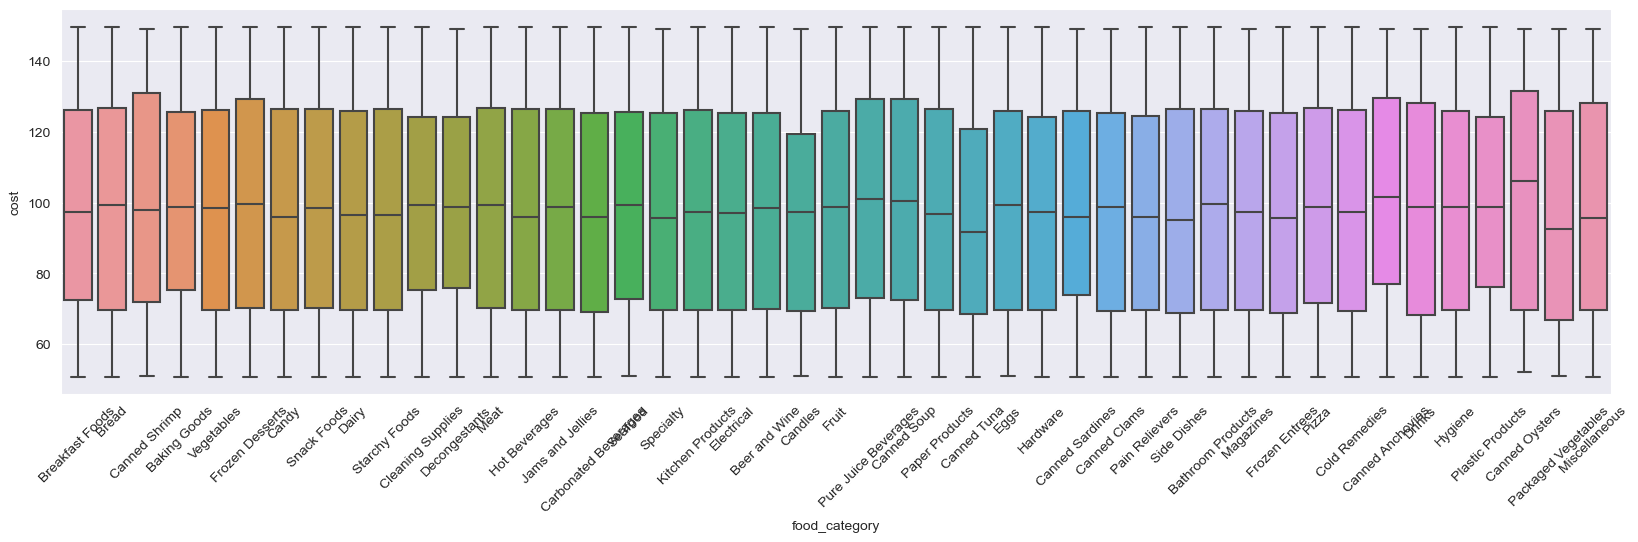

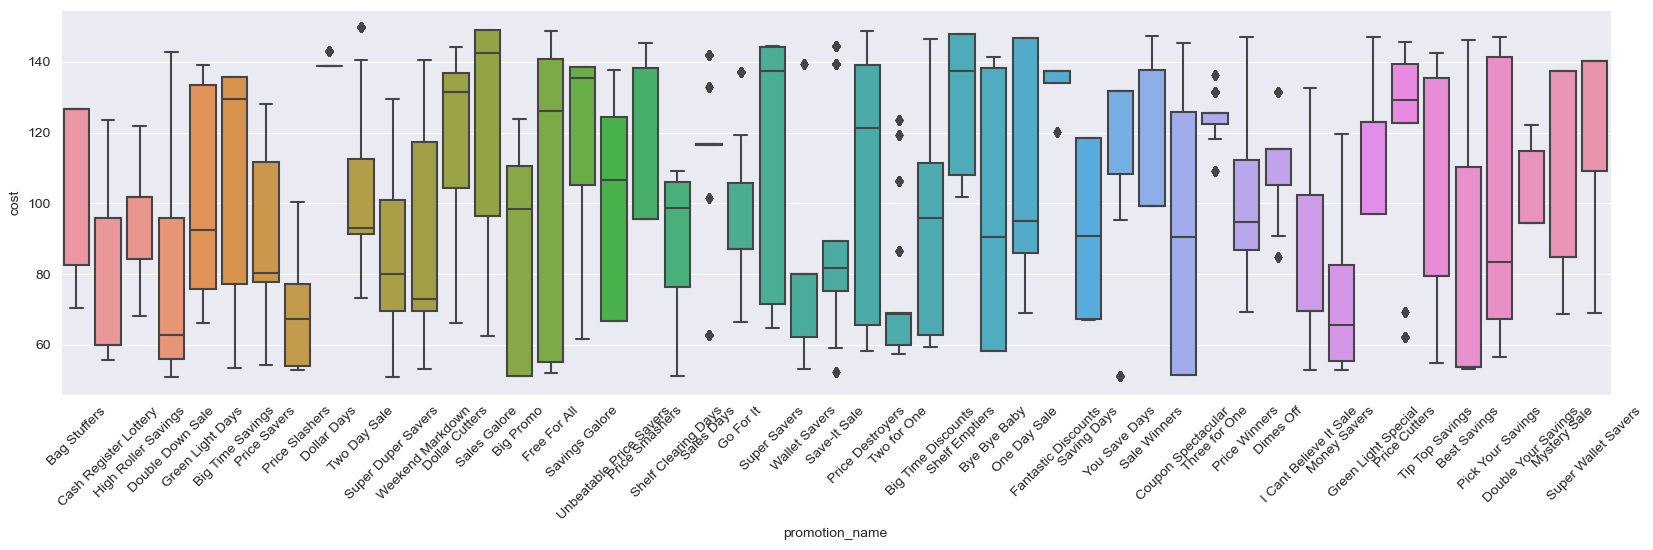

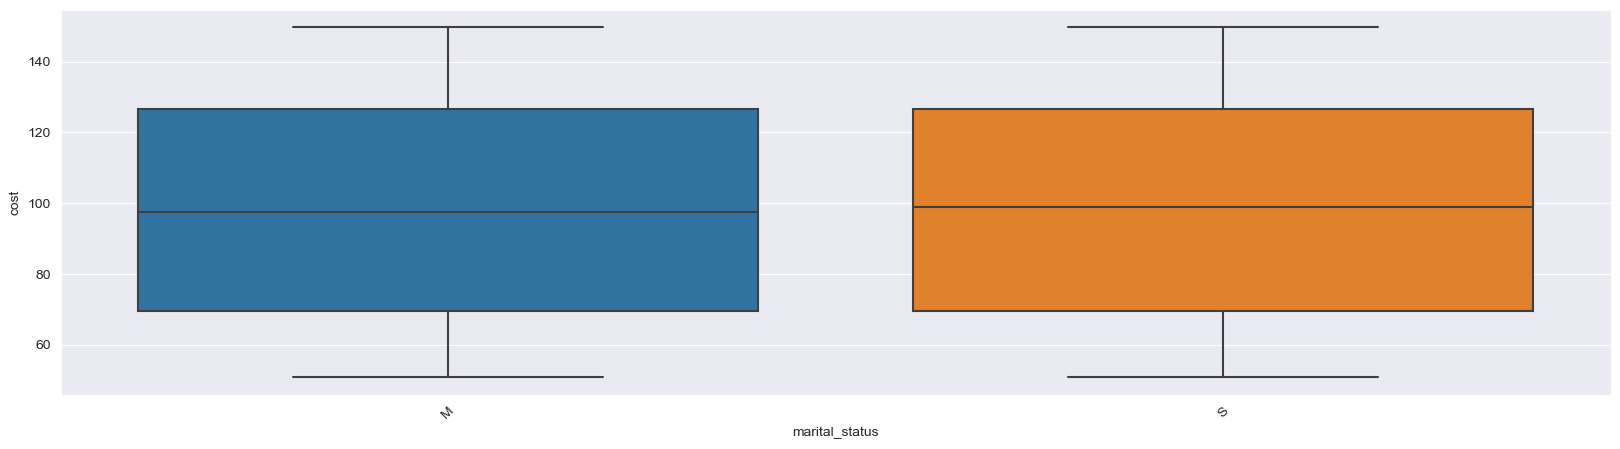

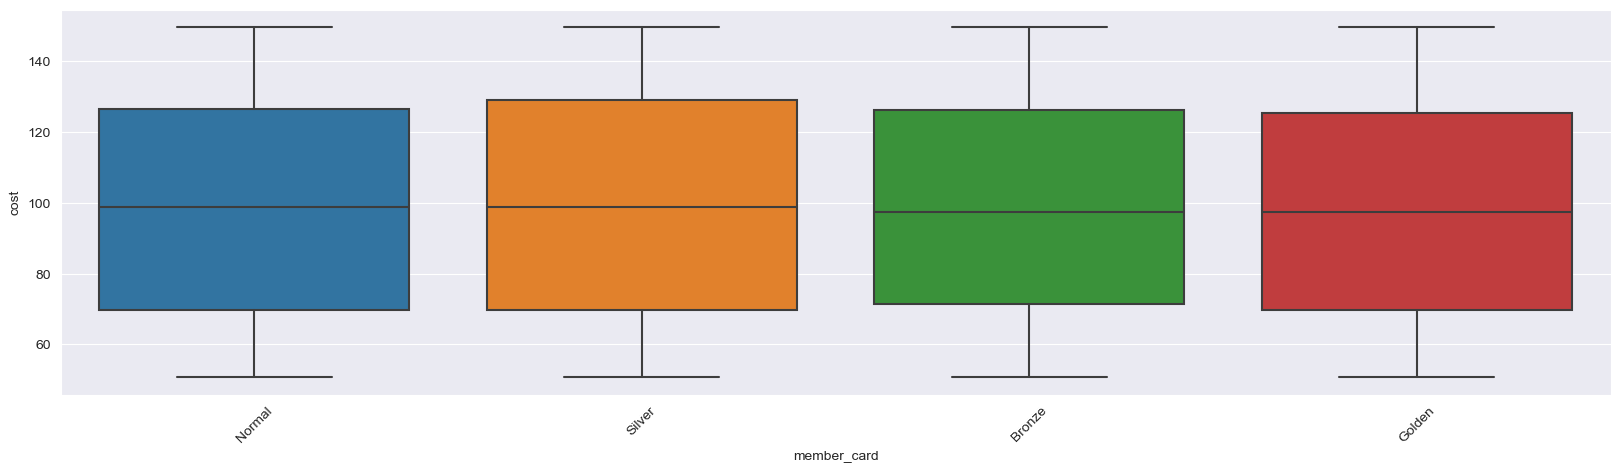

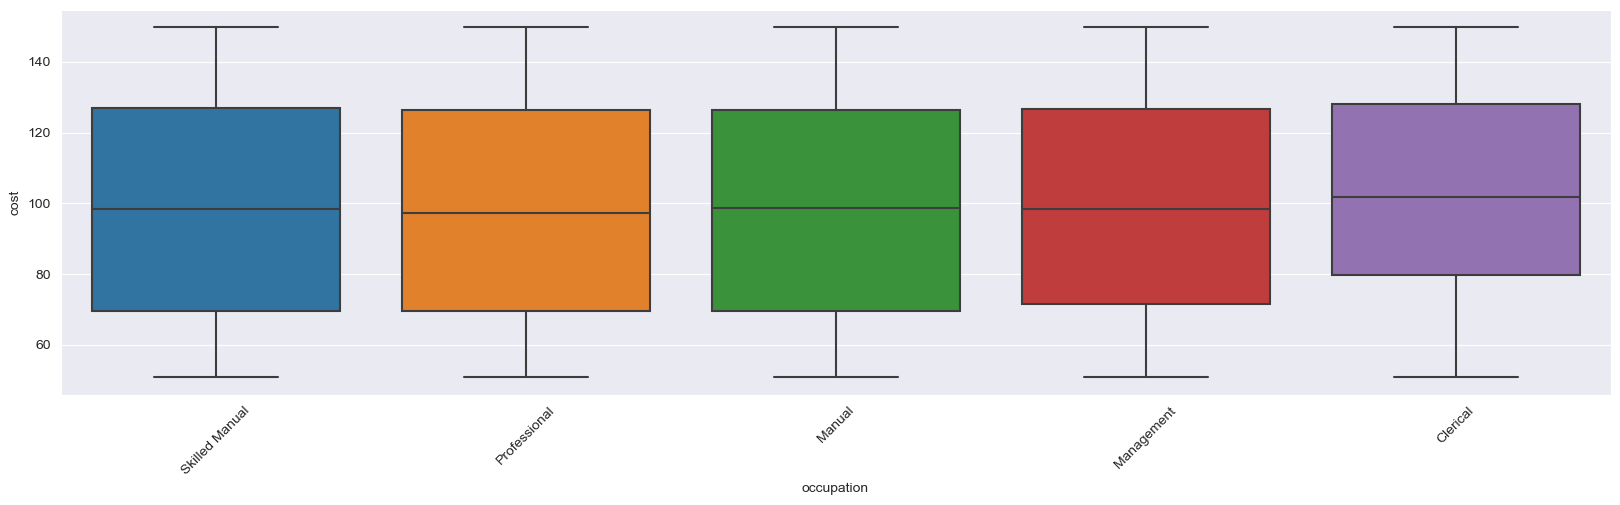

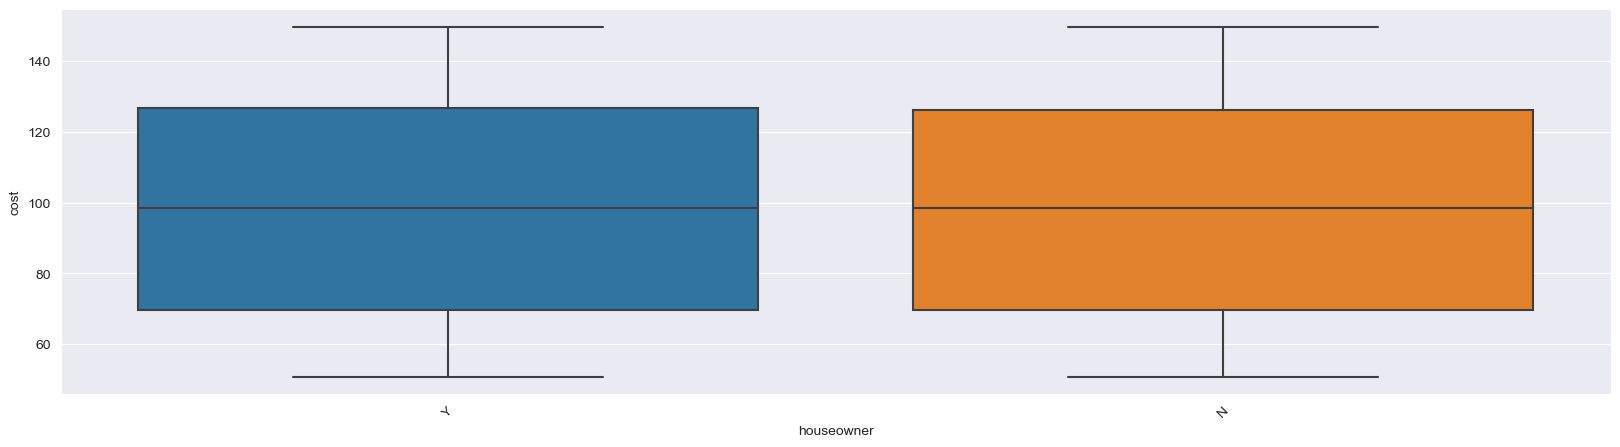

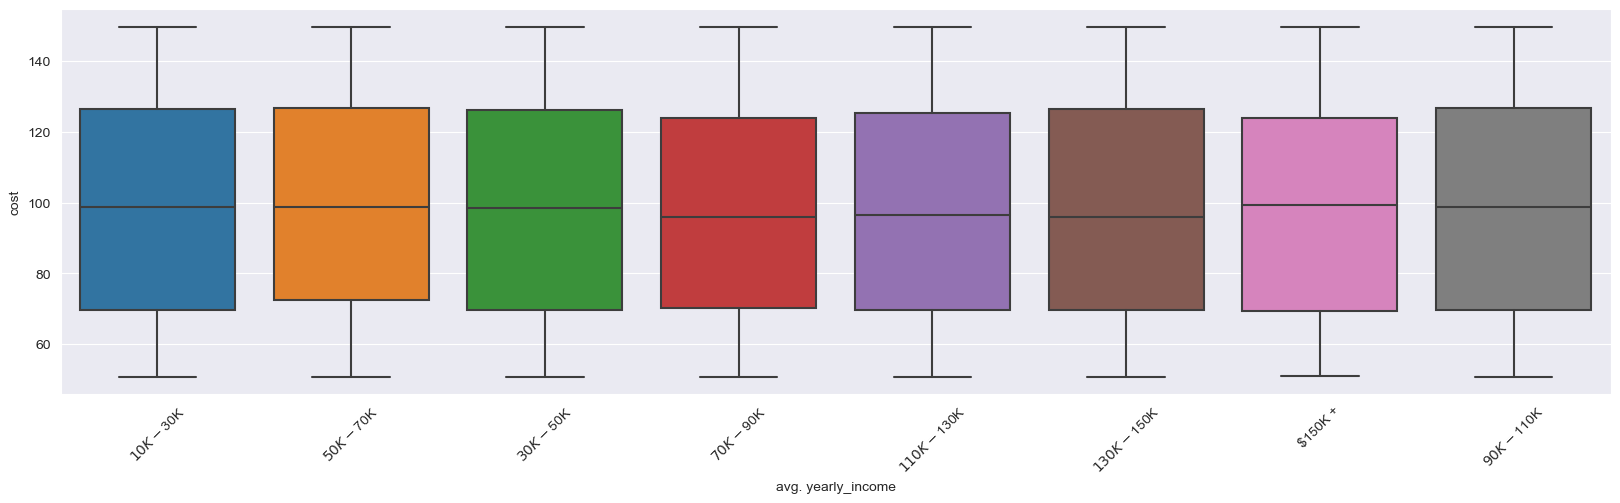

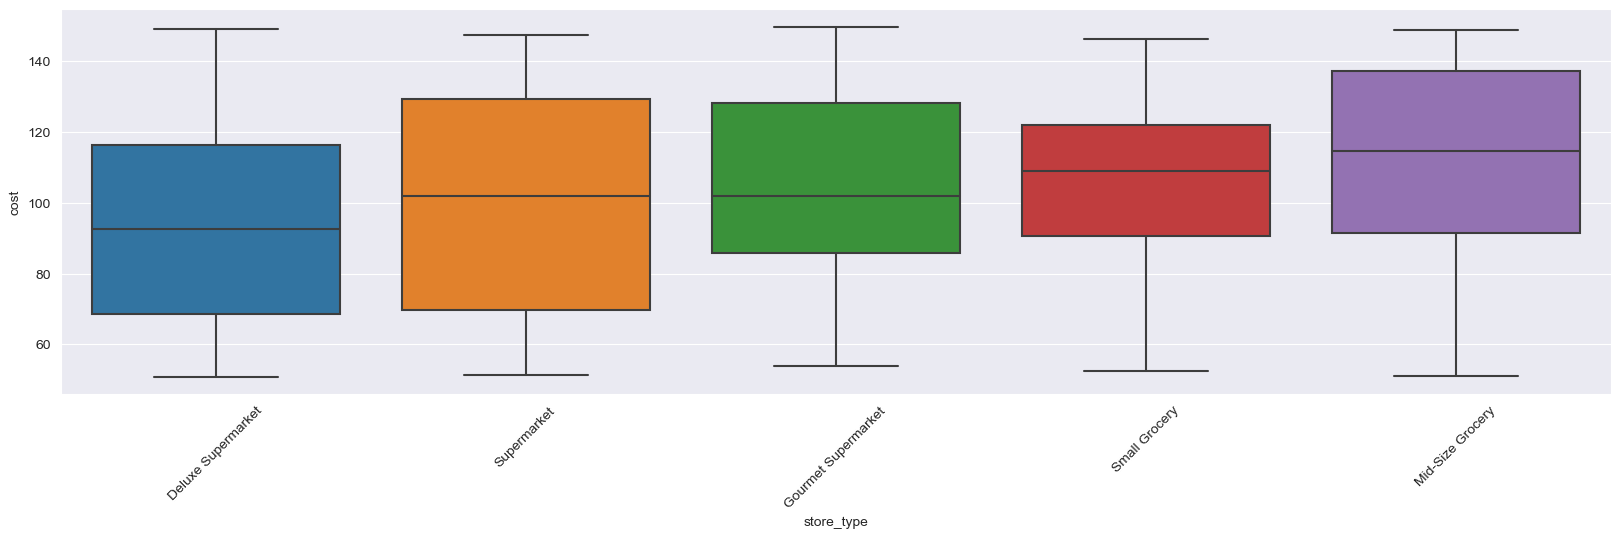

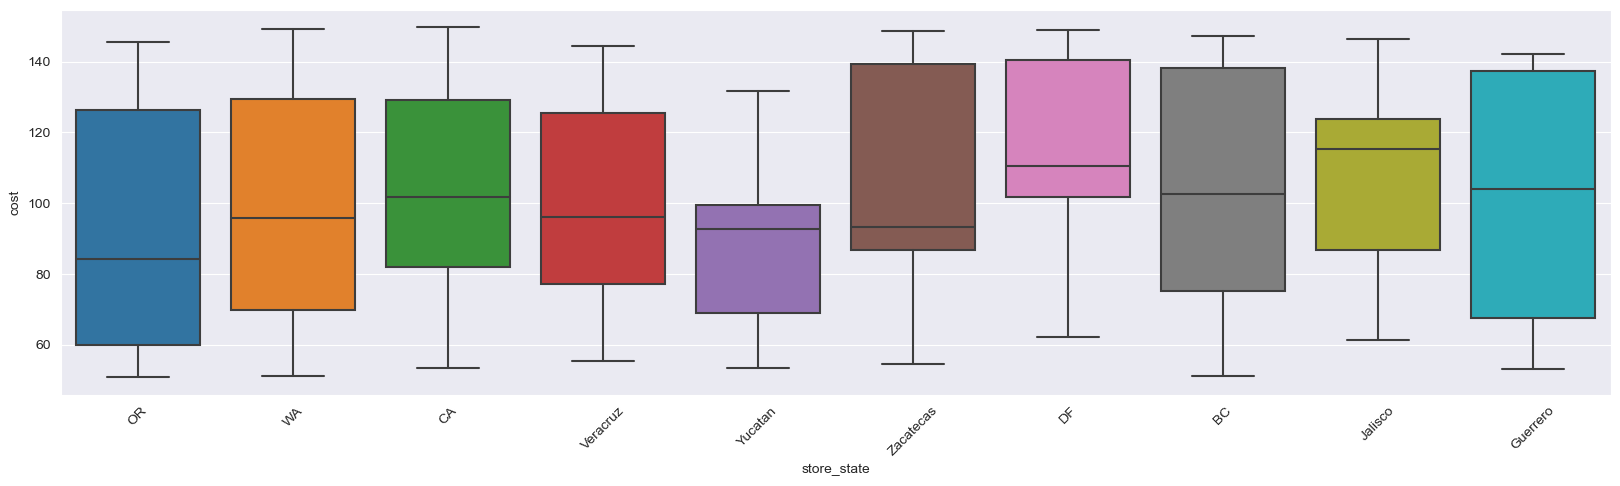

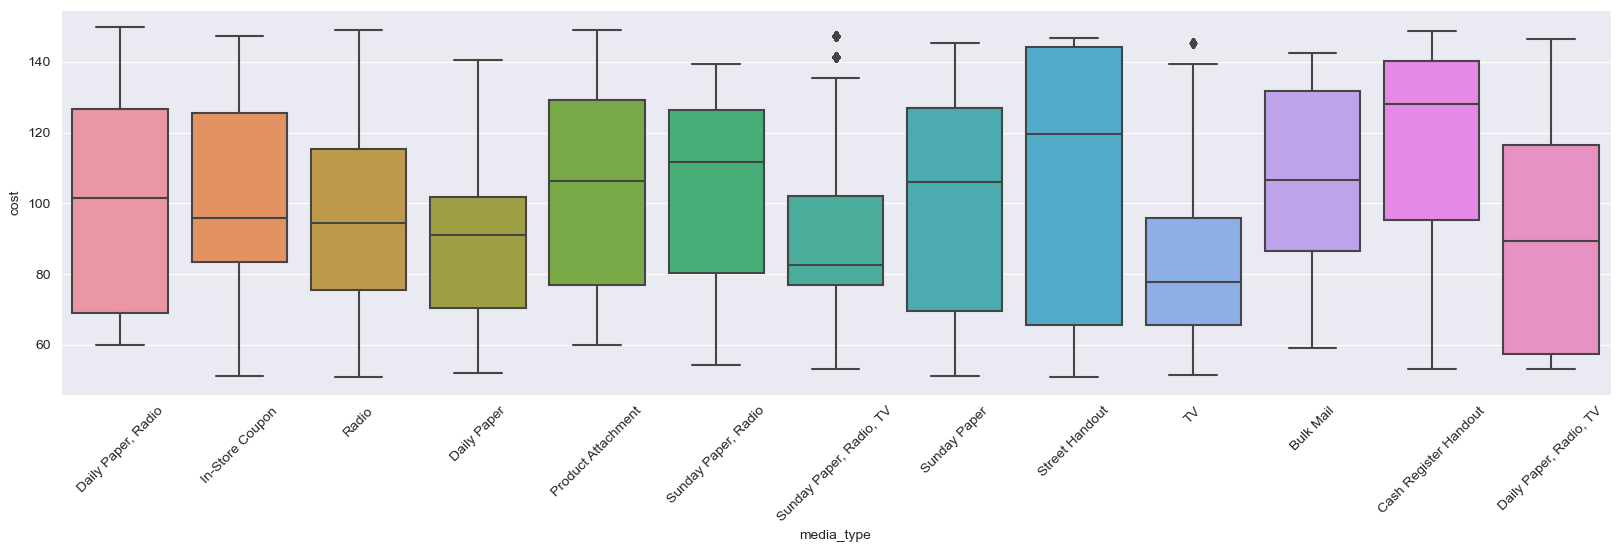

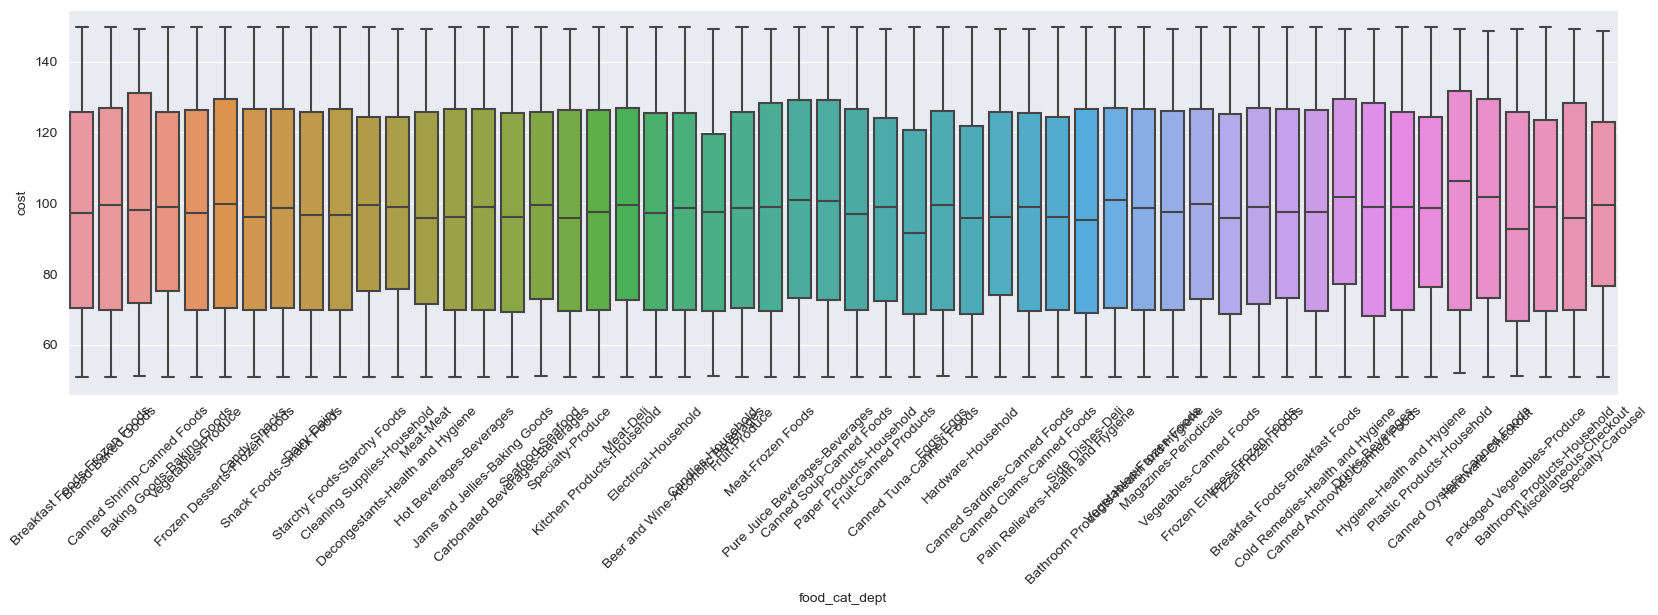

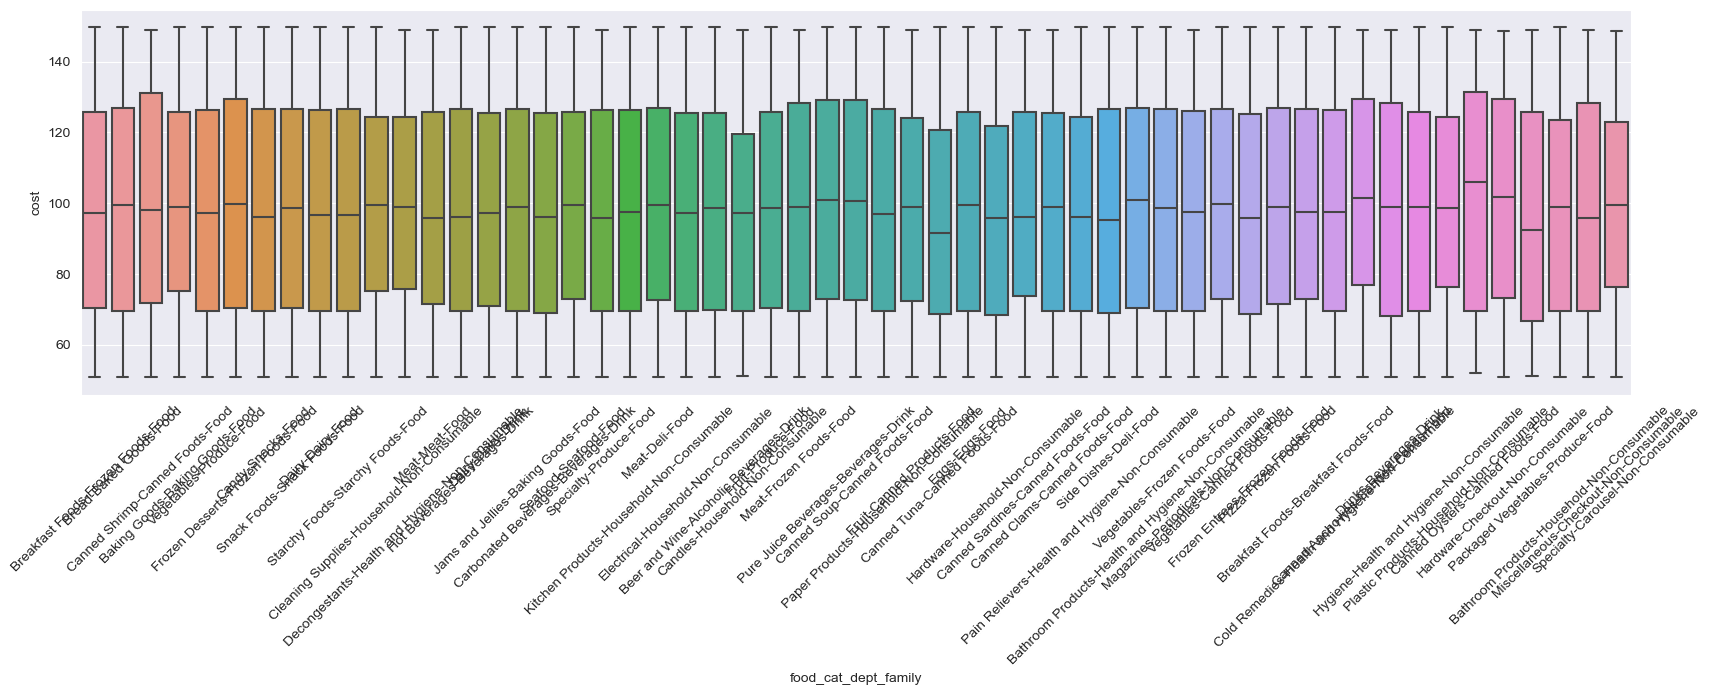

In [26]:
# plot non-numeric features against cost feature

for i in range(len(non_numeric_cols)):
    plt.figure(figsize=(20,5))
    sns.boxplot(data=df,x=non_numeric_cols[i], y='cost')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Non-numeric/categorical variables that seems to have impact on target variable cost -

#  'food_category',
#  'food_department',
#  'promotion_name',
#  'sales_country',
#  'avg. yearly_income',
#  'brand_name',
#  'store_type',
#  'store_city',
#  'store_state',
#  'media_type',
#  'food_cat_dept',
#  'food_cat_dept_family'

# Non-numeric/categorical variables that doesn't seem to have impact on target variable cost -

#  'food_family',
#  'marital_status',
#  'gender',
#  'education',
#  'member_card',
#  'occupation',
#  'houseowner'